In [11]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data visualization
from pylab import mpl, plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 9)

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load Data**

In [2]:
df = pd.read_csv('/content/IBM.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Cleaning & Imputation**

The data is cleaned. No further processing or imputation is required.

In [3]:
# Check for Nan
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [4]:
# Check for duplicates
df.duplicated().any()

False

Some of columns can be removed, because their values do not affect the analysis results.


*   Over18: All values are Y
*   EmployeeCount: all values are 1.0
*   StandardHours: all values are 80.0
*   EmployeeNumber: the ID of the employees.





In [5]:
df = df.drop(columns = {'Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'}, axis = 1)

# **EDA**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [7]:
# Separate the categorical & numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


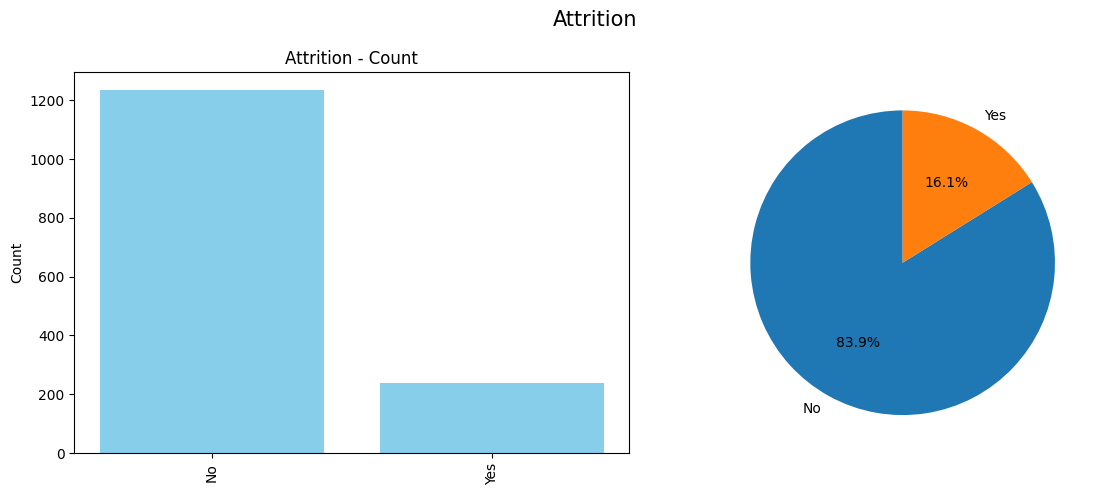

<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


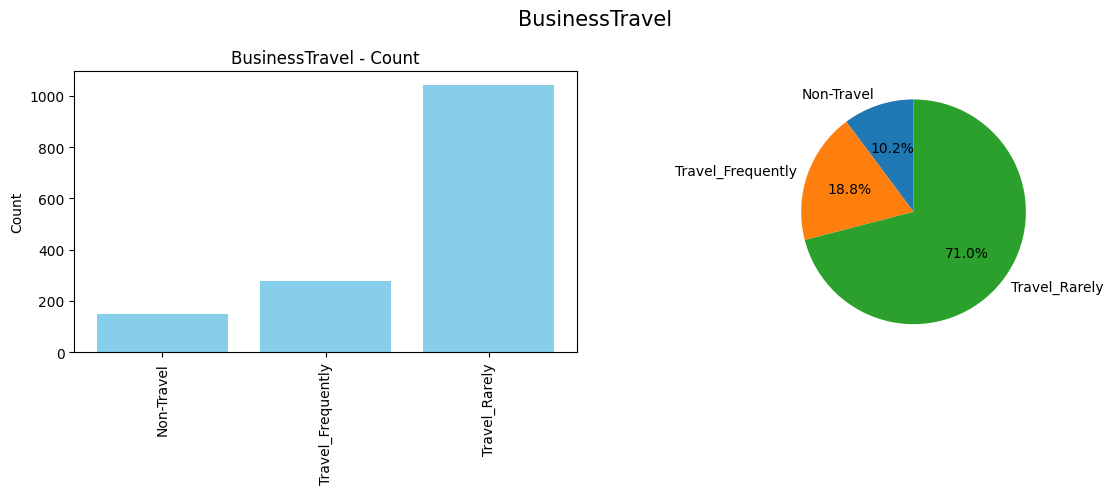

<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


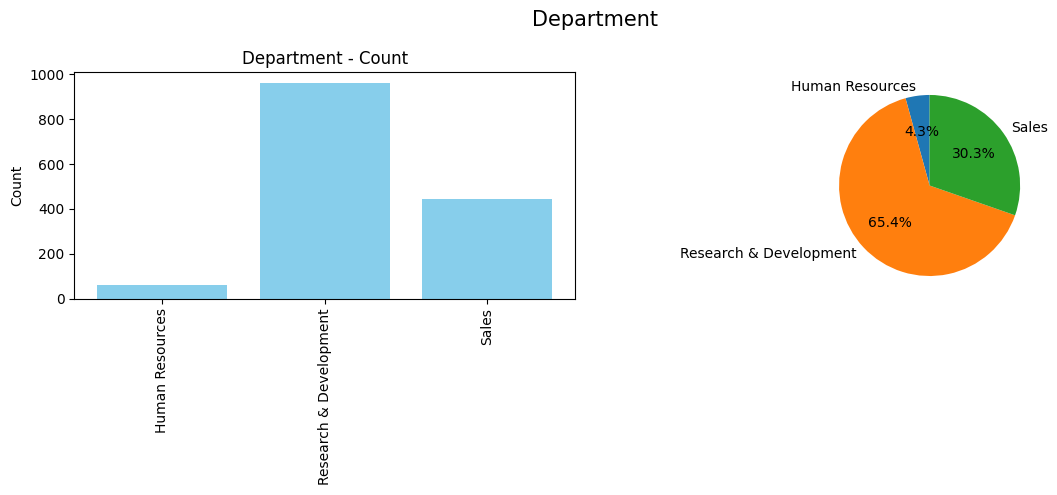

<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


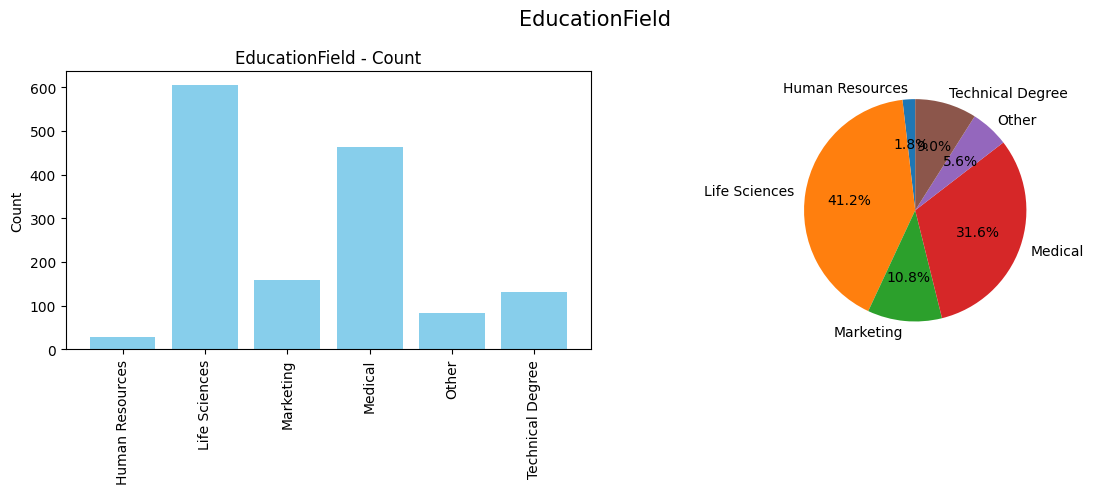

<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


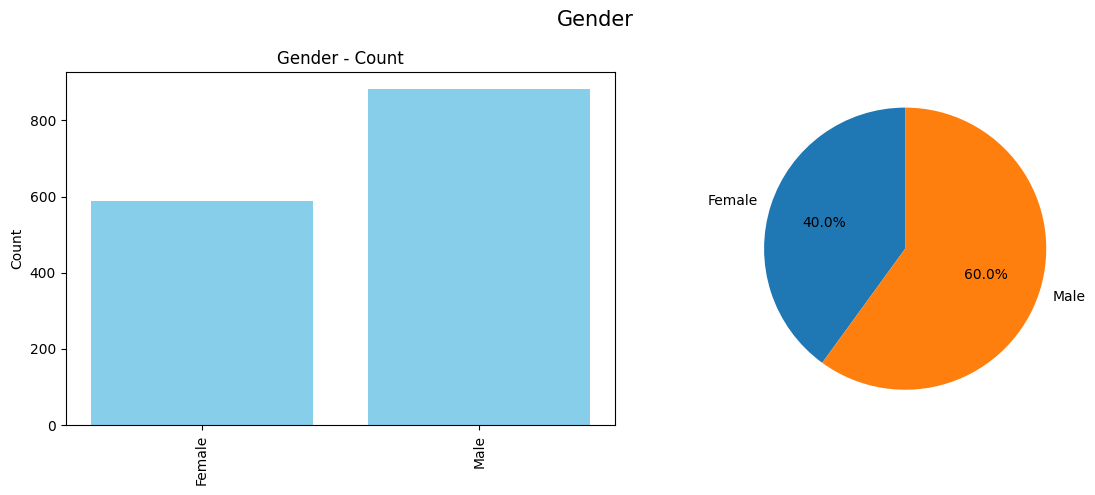

<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


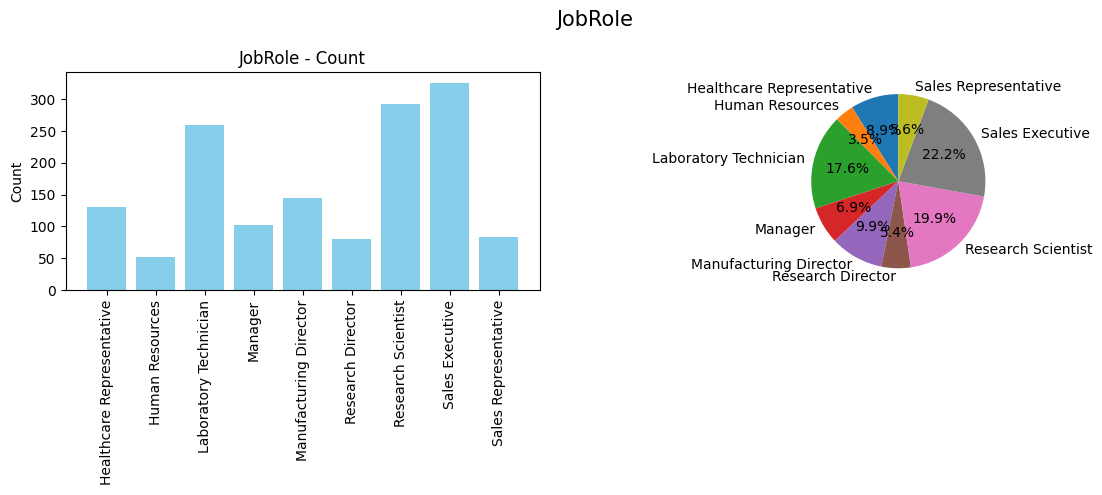

<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


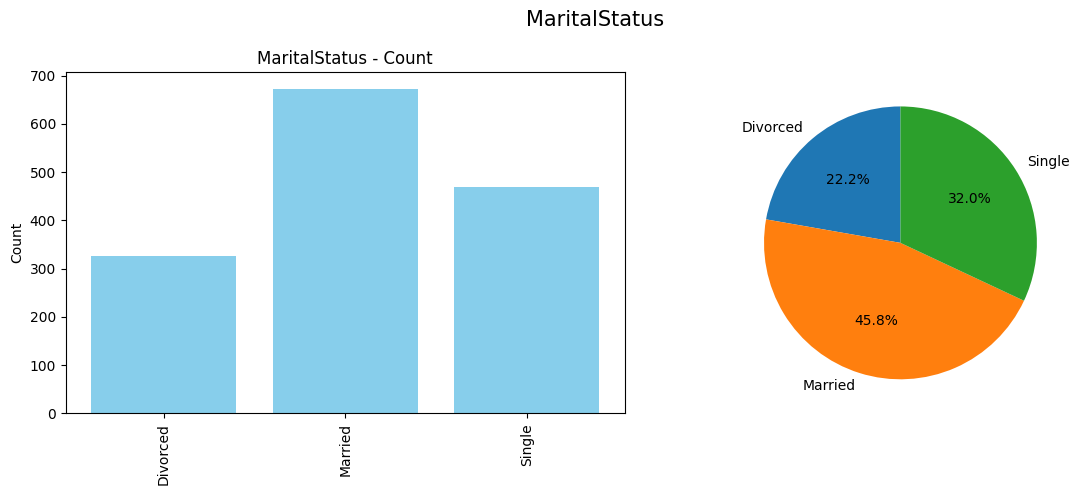

<ipython-input-8-b3c6da5ee6a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(activities, rotation=90)


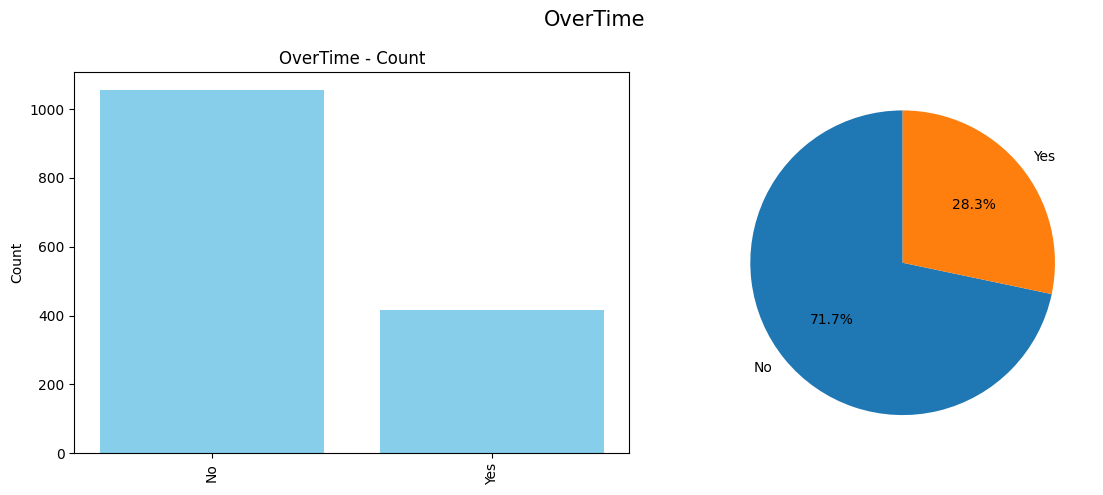

In [8]:
# Univariate analysis of categorical data
for col in cat:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Countplot of col
    counts = df[col].value_counts().sort_index()
    activities = counts.index
    axes[0].bar(activities, counts.values, color='skyblue')
    axes[0].set_xticklabels(activities, rotation=90)
    axes[0].set_ylabel("Count")
    axes[0].set_title(f"{col} - Count")

    # Pie chart of col
    axes[1].pie(counts.values, labels=activities, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})

    # Set main title
    fig.suptitle(col, fontsize=15)

    plt.tight_layout()
    plt.show()

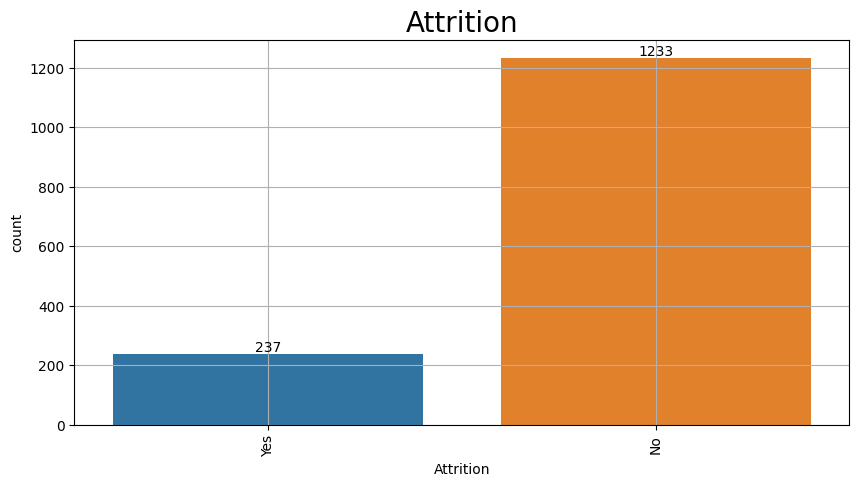

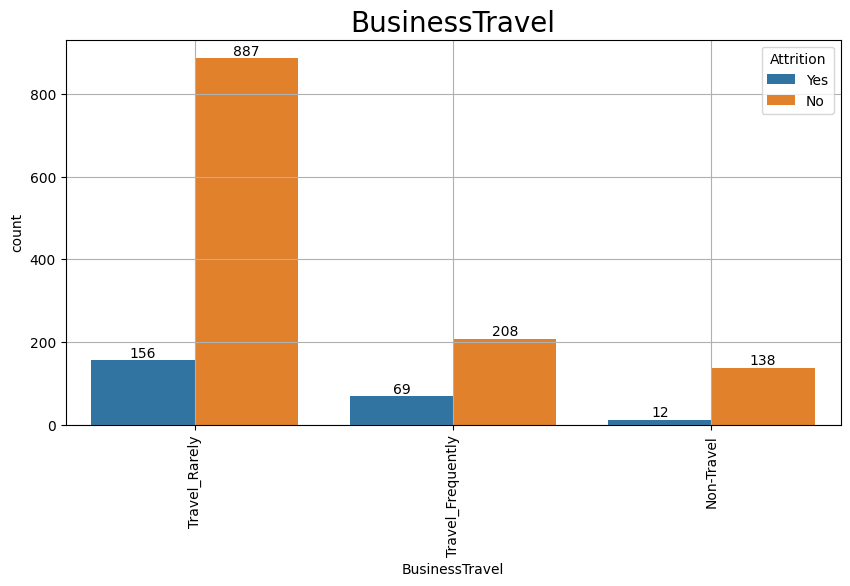

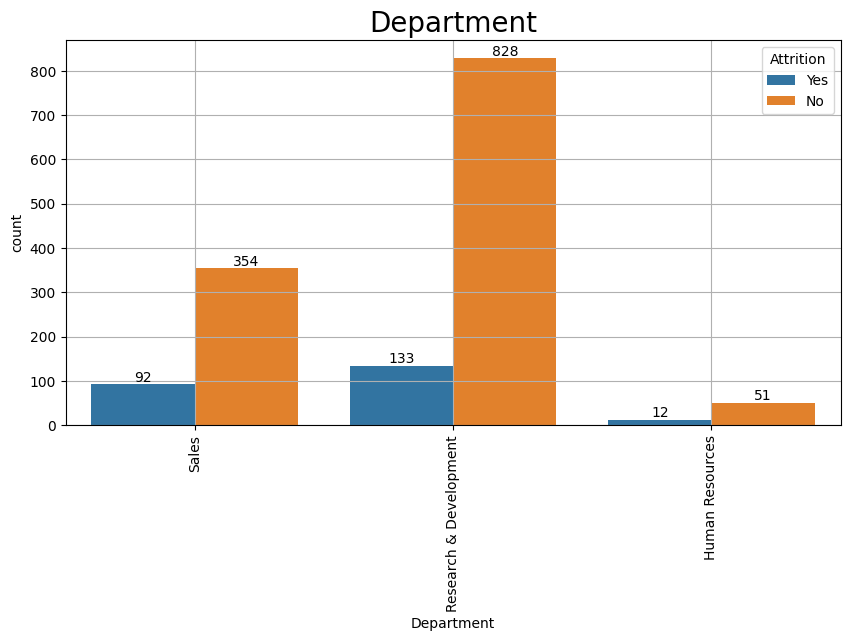

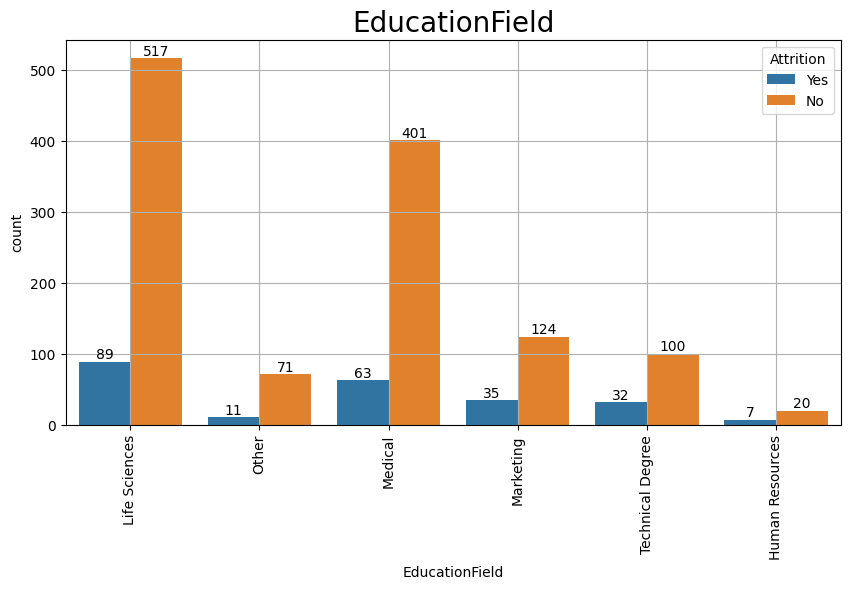

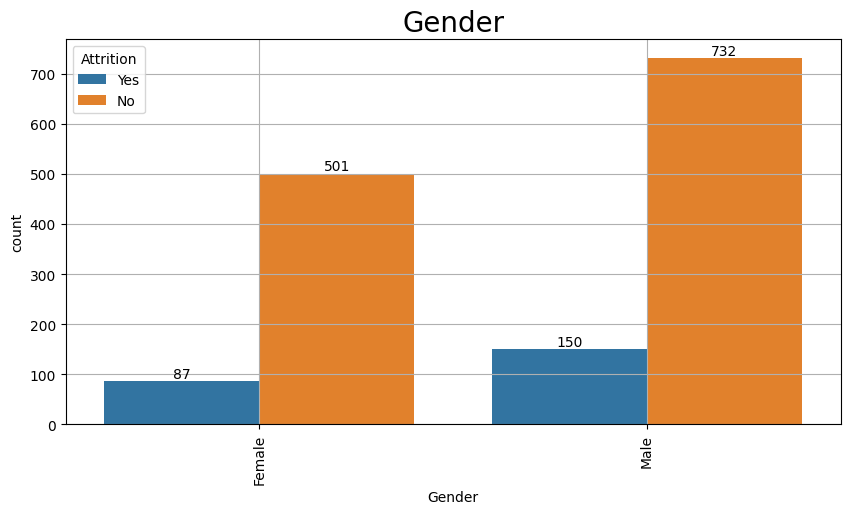

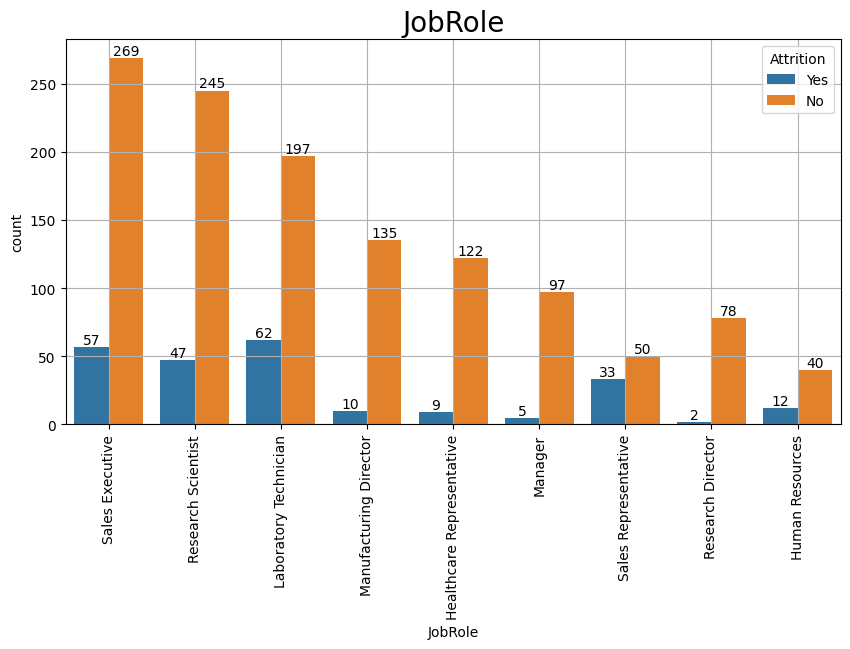

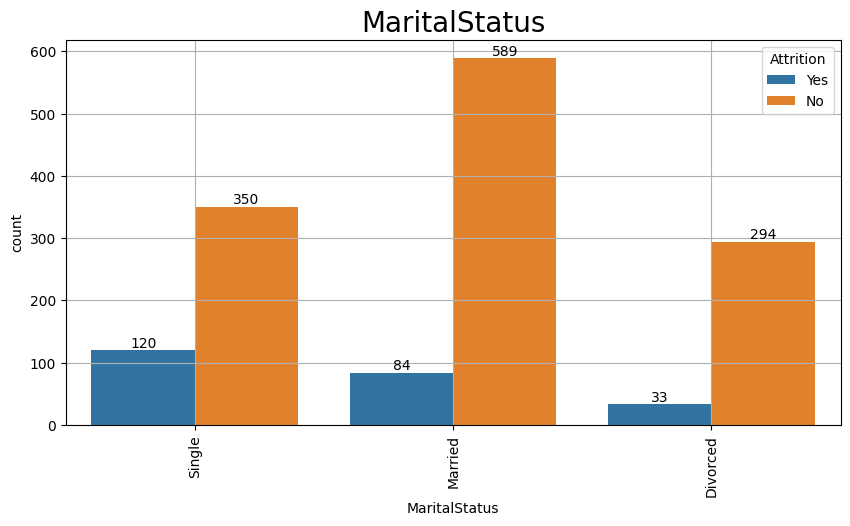

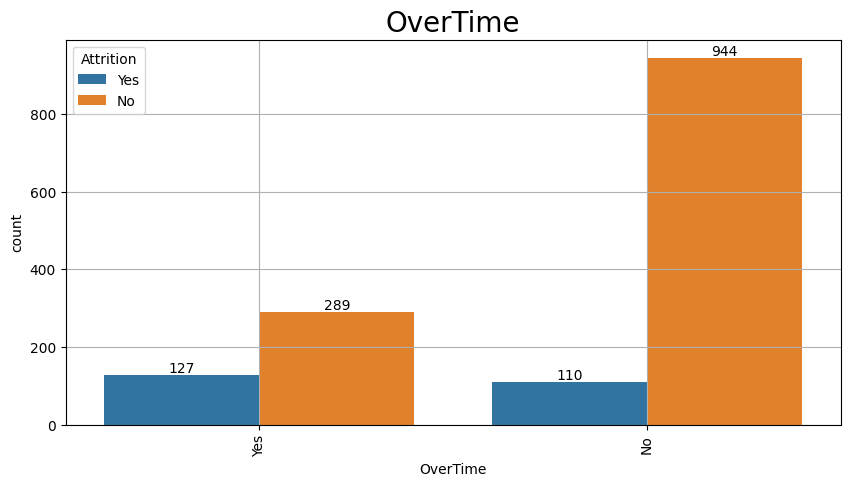

In [71]:
for column in cat :
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=10)
    plt.grid()
    plt.show()

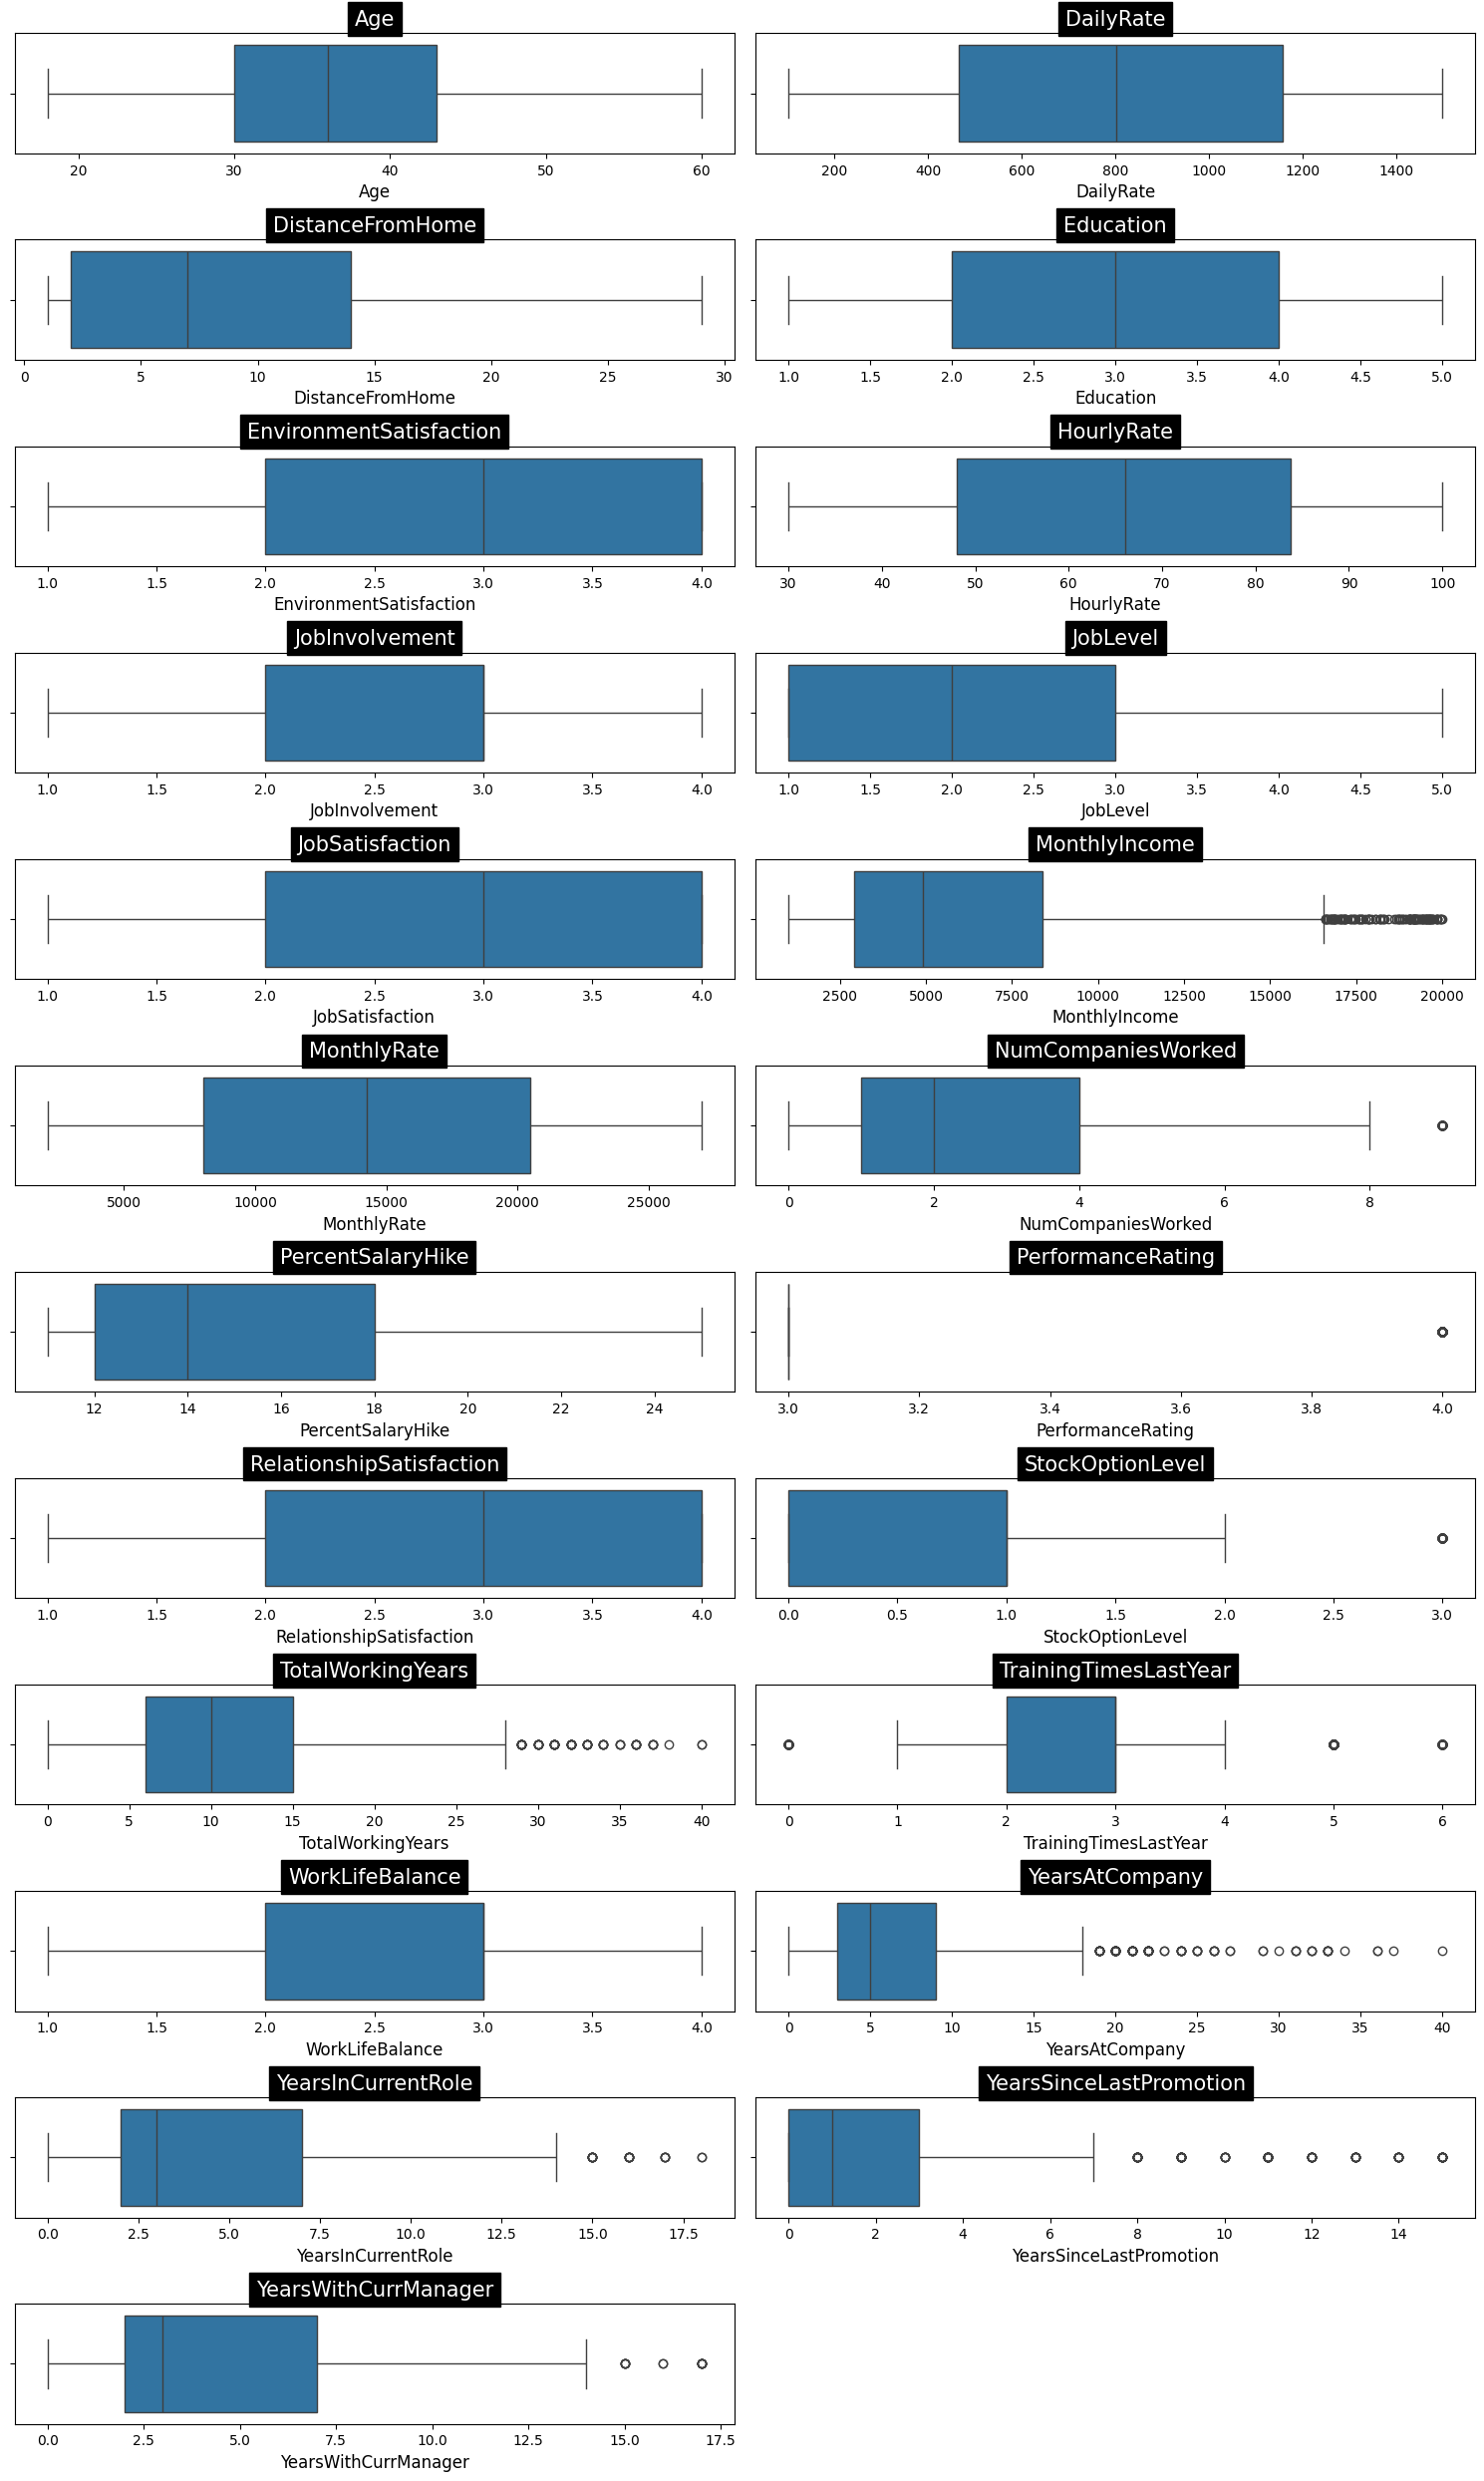

In [14]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

<Figure size 500x1000 with 0 Axes>

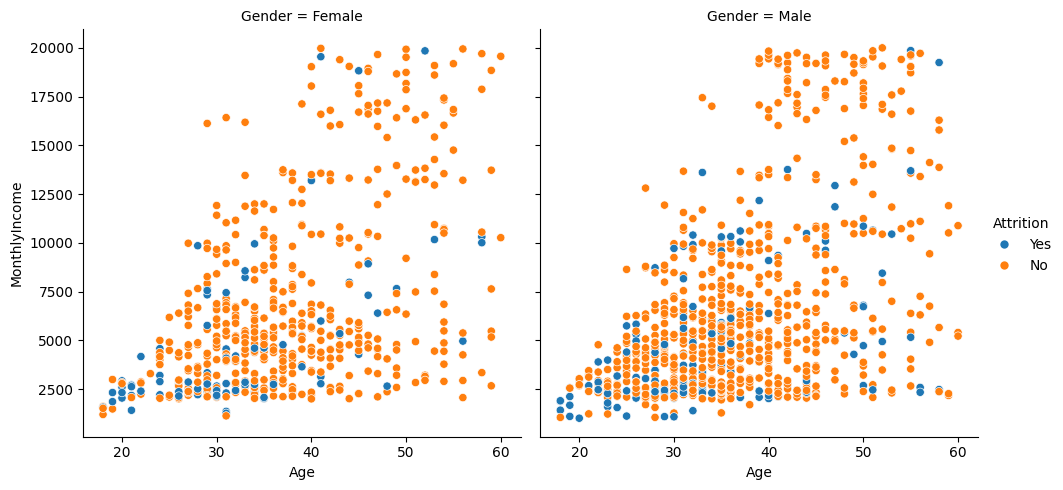

In [15]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

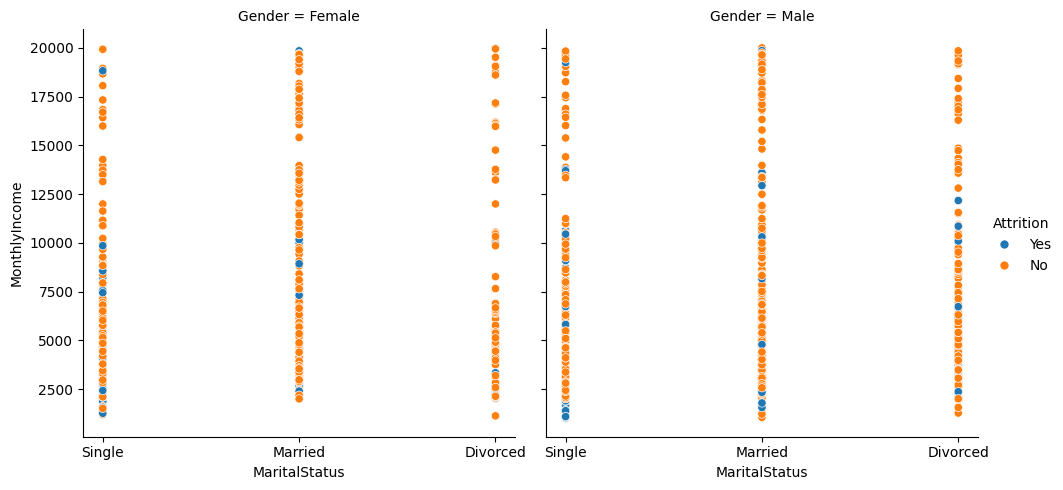

In [16]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

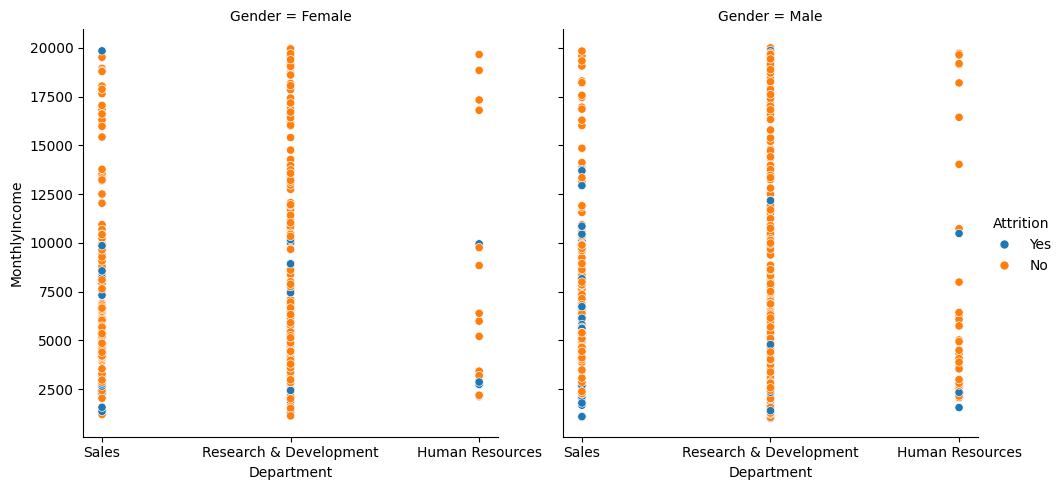

In [17]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

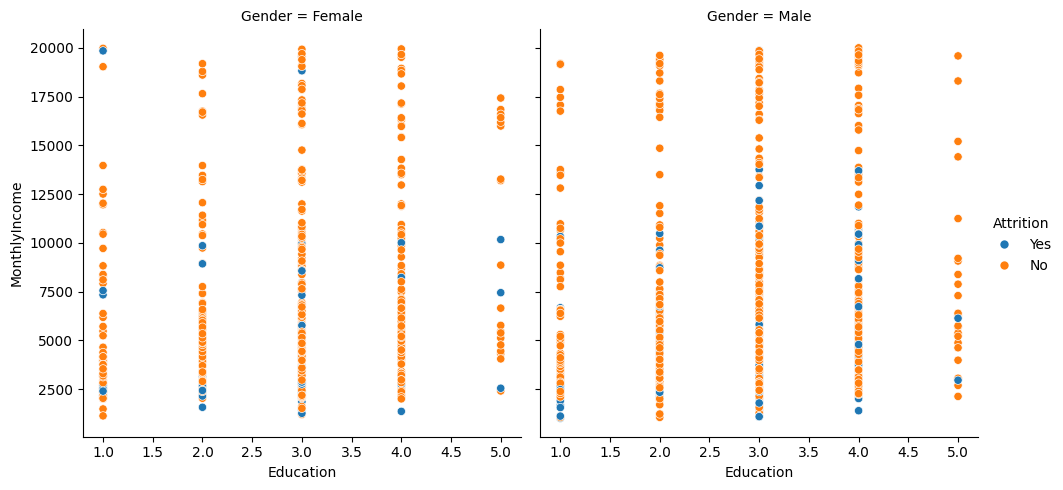

In [18]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<ipython-input-19-184f8f14fba3>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
<ipython-input-19-184f8f14fba3>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


<Figure size 500x1000 with 0 Axes>

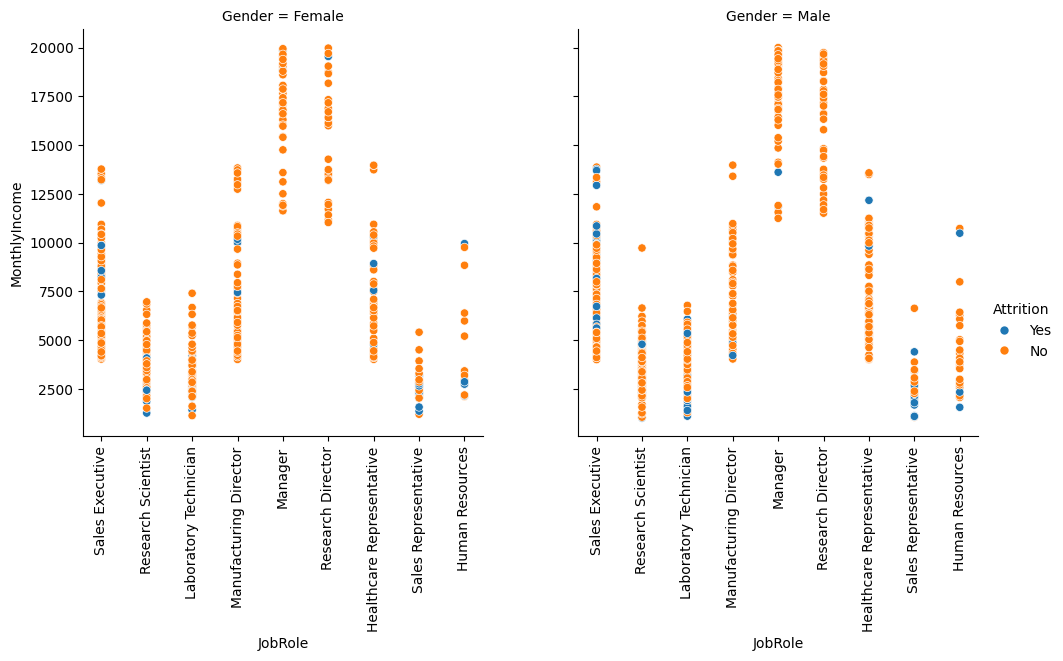

In [19]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

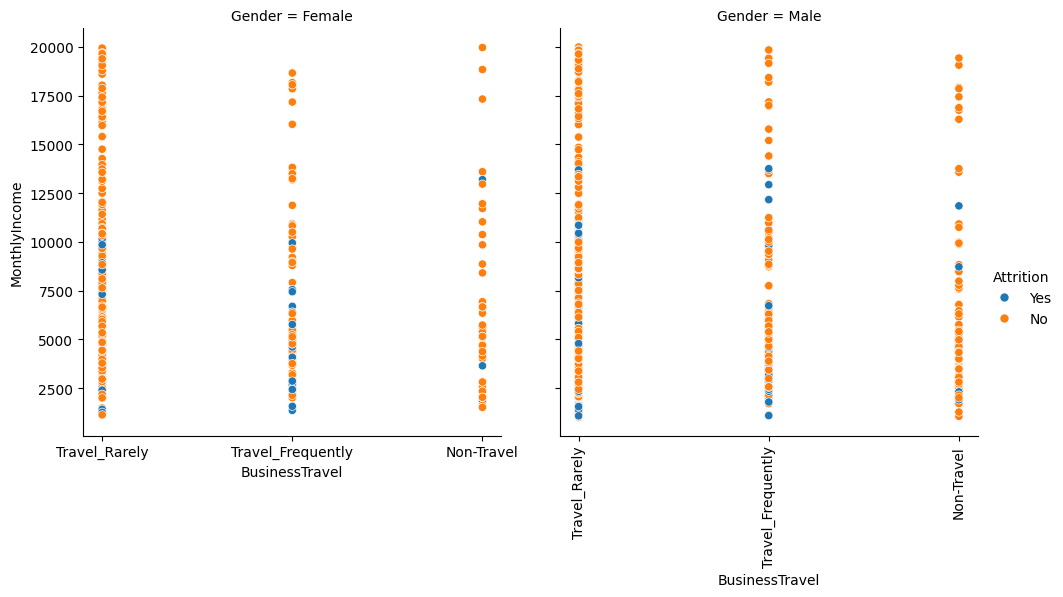

In [20]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

**Some useful insights:**


*   As income increases, attrition decreases.
*   Attrition is much less in divorce men.
*   Attrition is highest for employees in level 1 jobs.
*   Attrition is high among men in sales expert roles.
*   Women in managerial, research director, and laboratory technician roles have very low attrition.
*   Attrition is the highest for both men and women from 18 to 35 years of age, then gradually decreases.
*   Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.


In [21]:
# Create a copy
df1 = df.copy()

In [22]:
# Target Variable(Attrition)
df1['Attrition'] = df1['Attrition'].replace({'No':0,'Yes':1})

#encode binary variables
df1['OverTime'] = df1['OverTime'].map({'No':0,'Yes':1})
df1['Gender'] = df1['Gender'].map({'Male':0,'Female':1})

# Convert category attributes with 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    df1[column] = label_encoders[column].fit_transform(df1[column])

<ipython-input-22-3d6a496ffff2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Attrition'] = df1['Attrition'].replace({'No':0,'Yes':1})


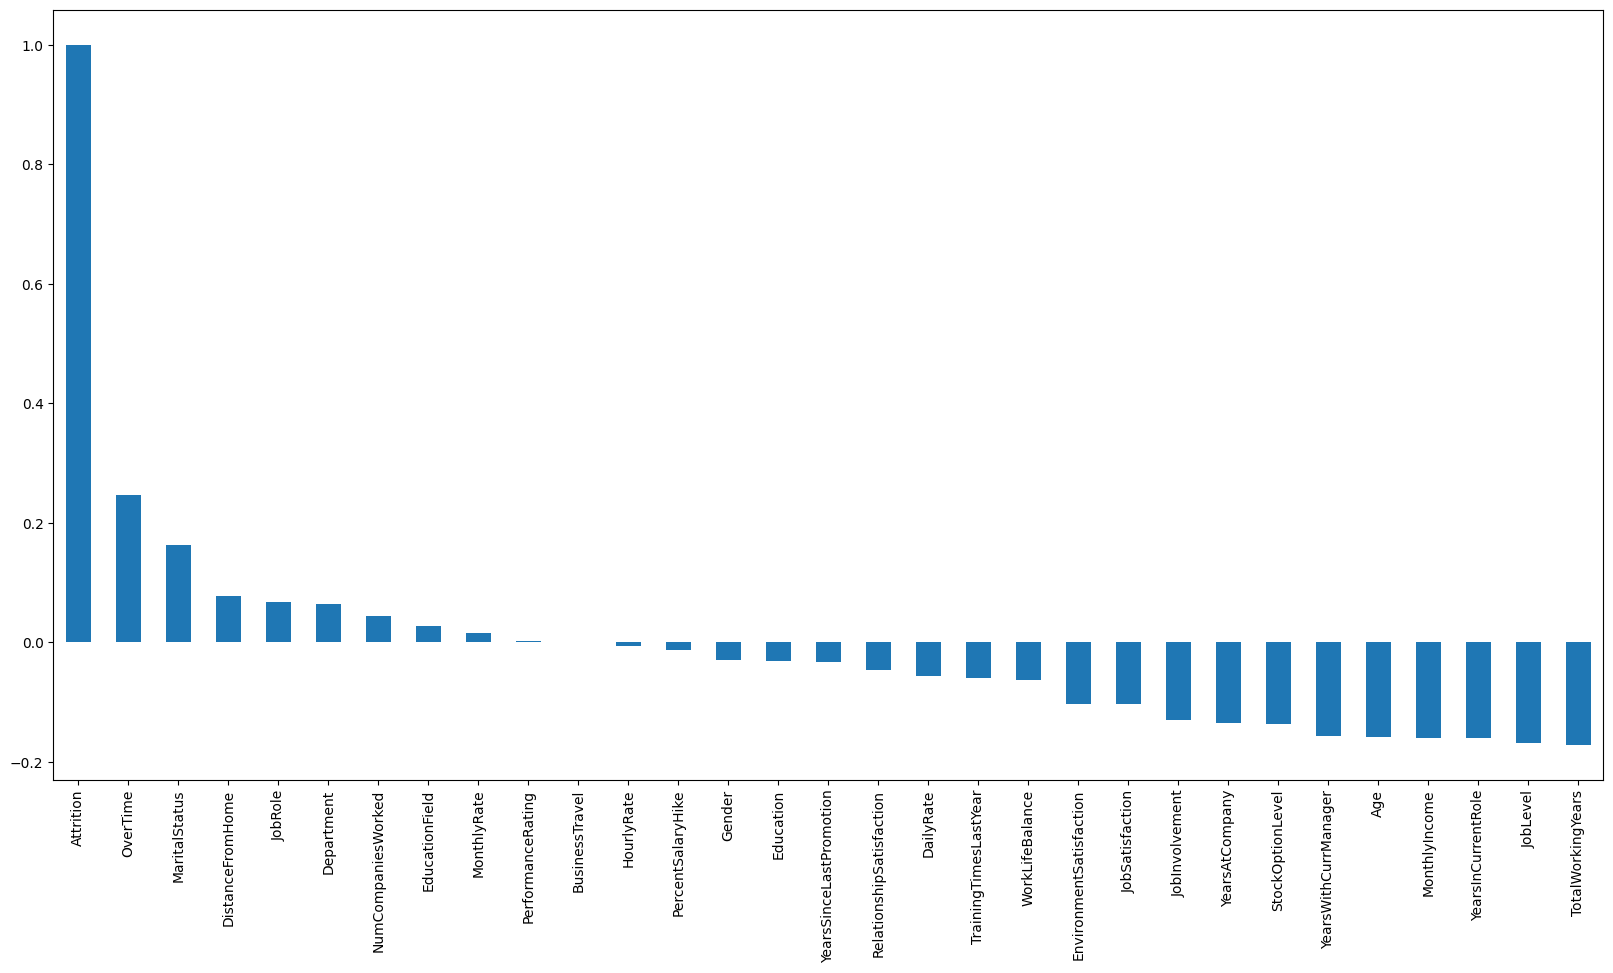

In [23]:
plt.figure(figsize=(20,10))
correlations=df1.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

# **Machine Learning model**

In [24]:
X = df1.drop(['Attrition'], axis=1)
y = df1['Attrition'].values

**Problem:**
   
Our data faces an imbalance problem, as the number of employees with attrition is much smaller than those without. In standard machine learning algorithms like Decision Trees and Logistic Regression, this imbalance can lead to a bias toward the majority class, causing the minority class to be overlooked. As a result, these models often predict only the majority class, leading to a significant misclassification of the minority class compared to the majority class.
  
  

**SMOTE:**  
  
To address this imbalance, we will use the SMOTE method, one of the most widely used oversampling techniques. SMOTE balances class distribution by generating new instances of the minority class through interpolation rather than simple replication. After oversampling, the data is restructured, allowing for the application of various classification models on the balanced dataset.

In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Over Sampling
rus = SMOTE(random_state = 42)
X_smote, y_smote = rus.fit_resample(X,y)

# Print counter
print(Counter(y))
print(Counter(y_smote))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [86]:
# Train - test split
X_train, X_test , y_train, y_test = train_test_split (X_smote ,y_smote, test_size = 0.2 , random_state = 0)

In [87]:
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

After completing the preprocessing steps, we will implement several machine learning models and compare them to identify the most accurate model for this data. Specifically, we will use two classification models: Logistic Regression and Random Forest Classifier.

In [82]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression train
log_reg=LogisticRegression(C=1,max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lg = log_reg.predict(X_test_scaled)

print ('accuracy', accuracy_score(y_test, y_pred_lg))

accuracy 0.8279352226720648


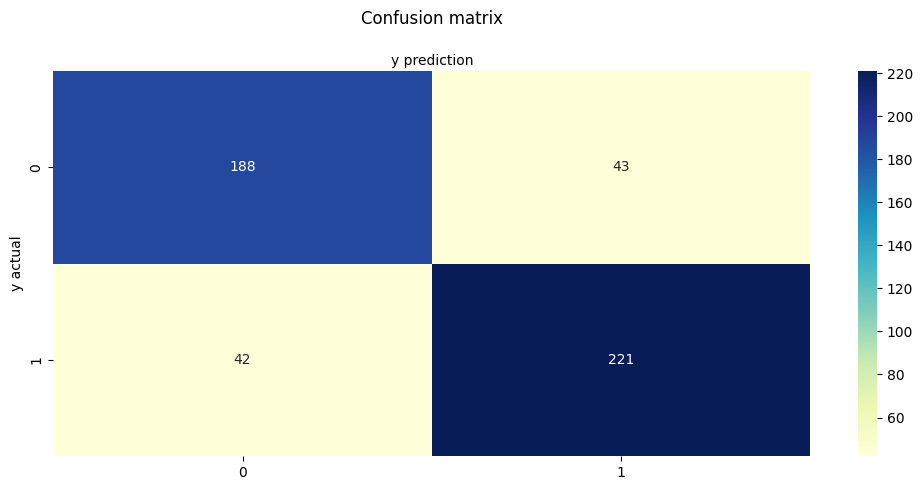

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       231
           1       0.84      0.84      0.84       263

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494



In [81]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred_lg))

The performance of Logistic Regression is strong, with an accuracy score of nearly 0.82, making it a reliable model for this dataset. We will now implement the Random Forest Classifier and make our final conclusion.

**Random Forest Classifier**

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
print ('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Accuracy Score: 0.8987854251012146


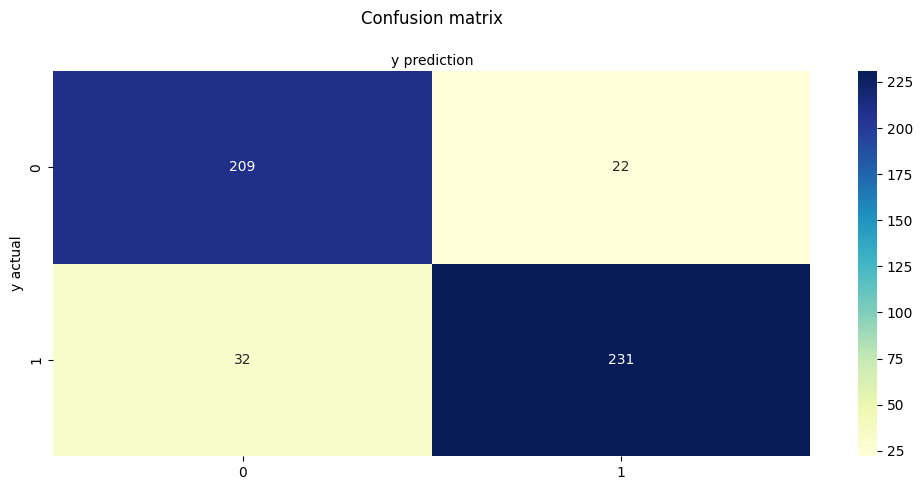

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       231
           1       0.91      0.88      0.90       263

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



In [84]:
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred_rf))

**Conclusion:**
  
The Random Forest Classifier outperforms the Logistic Regression model, achieving an accuracy score of nearly 0.90. Therefore, we conclude that the Random Forest Classifier is the superior model for predicting HR attrition in this dataset.